In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',-1)


C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_201756\1861972723.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [2]:
df = pd.read_csv('./cleaned_data.csv')
df.head(5)

,Name,Manufacturer,Brand,Condition,Price,Warranty_type,Warranty_time,Architecture,Max_resolution,Base_clock,Boost_clock,Memory_clock,Memory_size,Memory_type,Bus_width,Bandwidth,Cores,Length,Width,Height,Bus_interface,TDP,OpenGL,DirectX
0,RX570 PowerColor,Powercolor,AMD,Đã qua sử dụng,600000,Không có bảo hành,0,GCN 4.0,4096x2160,1168,1250.0,1750,4.0,GDDR5,256,224.0,2048,255.0,137.0,47.0,PCIe 3.0 x16,150,4.6,12
1,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4500000,Bảo hành hãng,2,RDNA 2.0,7680x4320,2375,2620.0,2000,12.0,GDDR6,192,384.0,2560,247.0,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate
2,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4730000,Bảo hành hãng,12,RDNA 2.0,7680x4320,2375,2620.0,2000,12.0,GDDR6,192,384.0,2560,247.0,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate
3,ASRock RX 6800,Asrock,AMD,Đã qua sử dụng,6450000,Không có bảo hành,0,RDNA 2.0,7680x4320,1700,2105.0,2000,16.0,GDDR6,256,512.0,3840,267.0,120.0,40.0,PCIe 4.0 x16,250,4.6,12 Ultimate
4,MSI RX 6650 XT 8gb OC,Msi,AMD,Đã qua sử dụng,6000000,Bảo hành hãng,34,RDNA 2.0,4096x2160,2055,2694.0,2190,8.0,GDDR6,128,280.3,2048,277.0,130.0,51.0,PCIe 4.0 x8,176,4.6,12 Ultimate


In [3]:
df.dtypes

Name              object 
Manufacturer      object 
Brand             object 
Condition         object 
Price             int64  
Warranty_type     object 
Warranty_time     int64  
Architecture      object 
Max_resolution    object 
Base_clock        int64  
Boost_clock       float64
Memory_clock      int64  
Memory_size       float64
Memory_type       object 
Bus_width         int64  
Bandwidth         float64
Cores             int64  
Length            float64
Width             float64
Height            float64
Bus_interface     object 
TDP               int64  
OpenGL            float64
DirectX           object 
dtype: object

Xây dựng mô hình

Sau khi phân tích thăm dò, các biến số quan trọng ảnh hưởng đến giá của VGA là: Memory_size, Cores, Bandwidth, TDP, và length. Ngoài ra còn các biến phân loại quan trọng ảnh hưởng đến giá của VGA là: Manufacturer, Architecture, Max_resolution, Memory_type, Bus_interface, DirectX.
- Để xây dựng mô hình cần phải xử lý các biến phân loại thành dạng số

In [4]:
df_dummies = pd.get_dummies(df[['Manufacturer', 'Architecture','Max_resolution', 'Memory_type', 'Bus_interface', 'DirectX']])
df_dummies.head(5)


,Manufacturer_Asrock,Manufacturer_Asus,Manufacturer_Colorful,Manufacturer_Gigabyte,Manufacturer_Intel,Manufacturer_Leaktek,Manufacturer_Msi,Manufacturer_Nvidia,Manufacturer_Powercolor,Manufacturer_Sapphire,Manufacturer_Zotac,Architecture_Ada Lovelace,Architecture_Ampere,Architecture_Fermi,Architecture_Fermi 2.0,Architecture_GCN 1.0,Architecture_GCN 4.0,Architecture_Generation 12.7,Architecture_Kepler,Architecture_Kepler 2.0,Architecture_Maxwell,Architecture_Maxwell 2.0,Architecture_Pascal,Architecture_RDNA 1.0,Architecture_RDNA 2.0,Architecture_Turing,Max_resolution_1920x1080,Max_resolution_2048x1536,Max_resolution_2560x1600,Max_resolution_2560×1600,Max_resolution_3840x2160,Max_resolution_4096x2160,Max_resolution_5120x2880,Max_resolution_7680x4320,Memory_type_DDR4,Memory_type_GDDR3,Memory_type_GDDR5,Memory_type_GDDR6,Memory_type_GDDR6X,Bus_interface_PCIe 2.0 x16,Bus_interface_PCIe 3.0 x16,Bus_interface_PCIe 3.0 x4,Bus_interface_PCIe 4.0 x16,Bus_interface_PCIe 4.0 x4,Bus_interface_PCIe 4.0 x8,DirectX_12,DirectX_12 Ultimate
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [5]:
df_numberical = df[['Memory_size', 'Cores', 'Bandwidth', 'TDP', 'Length']]
df_process = pd.concat([df_numberical,df_dummies],axis=1)
df_process.head(5)

,Memory_size,Cores,Bandwidth,TDP,Length,Manufacturer_Asrock,Manufacturer_Asus,Manufacturer_Colorful,Manufacturer_Gigabyte,Manufacturer_Intel,Manufacturer_Leaktek,Manufacturer_Msi,Manufacturer_Nvidia,Manufacturer_Powercolor,Manufacturer_Sapphire,Manufacturer_Zotac,Architecture_Ada Lovelace,Architecture_Ampere,Architecture_Fermi,Architecture_Fermi 2.0,Architecture_GCN 1.0,Architecture_GCN 4.0,Architecture_Generation 12.7,Architecture_Kepler,Architecture_Kepler 2.0,Architecture_Maxwell,Architecture_Maxwell 2.0,Architecture_Pascal,Architecture_RDNA 1.0,Architecture_RDNA 2.0,Architecture_Turing,Max_resolution_1920x1080,Max_resolution_2048x1536,Max_resolution_2560x1600,Max_resolution_2560×1600,Max_resolution_3840x2160,Max_resolution_4096x2160,Max_resolution_5120x2880,Max_resolution_7680x4320,Memory_type_DDR4,Memory_type_GDDR3,Memory_type_GDDR5,Memory_type_GDDR6,Memory_type_GDDR6X,Bus_interface_PCIe 2.0 x16,Bus_interface_PCIe 3.0 x16,Bus_interface_PCIe 3.0 x4,Bus_interface_PCIe 4.0 x16,Bus_interface_PCIe 4.0 x4,Bus_interface_PCIe 4.0 x8,DirectX_12,DirectX_12 Ultimate
0,4.0,2048,224.0,150,255.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,12.0,2560,384.0,230,247.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,12.0,2560,384.0,230,247.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
3,16.0,3840,512.0,250,267.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,8.0,2048,280.3,176,277.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


- Chuẩn hóa dữ liệu

In [6]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Scaler.fit(df_process)

StandardScaler()

In [7]:
df_preprocces = Scaler.transform(df_process)
df_preprocces

array([[-0.79975567, -0.29999017, -0.49203636, ..., -0.48637346,
         1.29399328, -1.29399328],
       [ 1.0606115 , -0.10184536,  0.33817706, ..., -0.48637346,
        -0.77280154,  0.77280154],
       [ 1.0606115 , -0.10184536,  0.33817706, ..., -0.48637346,
        -0.77280154,  0.77280154],
       ...,
       [ 0.13042792,  1.18609592,  0.67026243, ..., -0.48637346,
        -0.77280154,  0.77280154],
       [ 1.0606115 ,  0.29444427,  0.21364505, ..., -0.48637346,
        -0.77280154,  0.77280154],
       [-0.79975567, -0.74581599, -0.65807904, ..., -0.48637346,
         1.29399328, -1.29399328]])

- Chia bộ dữ liệu thành 2 tập train 80% và test 20%

In [8]:
from sklearn.model_selection import train_test_split
X = df_preprocces
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

In [10]:
LR.fit(X_train,y_train)

LinearRegression()

In [11]:
y_Pre = LR.predict(X_test)
y_Pre

array([ 3201795.14365131,  3749316.44269582, 24654485.43323454,
        6096153.8461538 ,  2784337.94583174,   271837.52028793,
        3891600.00000001,  6096153.8461538 ,  3445104.9894876 ,
        2784337.94583174,  6218173.84649449, -1005047.86943594,
        4556027.36987304,  6509191.4077446 ,  3121433.96347518,
        1882283.13293813,  6096153.8461538 ,   200000.00000009,
       11899964.43450882,  3716994.35548742,  4655475.52265556,
       12611135.25563488,  2784337.94583174])

In [12]:
y_test

81     5990000 
4      6000000 
40     21000000
69     6590000 
10     1950000 
45     999000  
70     4199000 
66     5999000 
47     1500000 
11     1850000 
100    7790000 
36     1000000 
84     6290000 
113    12500000
18     3990000 
0      600000  
72     6390000 
26     400000  
105    8690000 
53     1950000 
94     5090000 
112    19389000
12     1800000 
Name: Price, dtype: int64

- RandomForest

In [13]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

In [14]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_Pre_2 = RFR.predict(X_test)
y_Pre_2

array([ 5976836.66666667,  4183310.        , 23793453.33333334,
        6090152.73523733,  2750226.66666667,  1791493.33333333,
        3895075.38888889,  6090152.73523733,  3066278.66666667,
        2750226.66666667,  7730840.        ,  1027300.        ,
        5826483.88888889,  7674110.        ,  3059625.        ,
        2095330.        ,  6090152.73523733,   428640.        ,
        8268639.58333333,  3577462.95238095,  3383950.71428571,
       14410191.11111111,  2750226.66666667])

In [16]:
y_test

81     5990000 
4      6000000 
40     21000000
69     6590000 
10     1950000 
45     999000  
70     4199000 
66     5999000 
47     1500000 
11     1850000 
100    7790000 
36     1000000 
84     6290000 
113    12500000
18     3990000 
0      600000  
72     6390000 
26     400000  
105    8690000 
53     1950000 
94     5090000 
112    19389000
12     1800000 
Name: Price, dtype: int64

Đánh giá mô hình

- Sử dụng trực quan để đánh giá mô hình

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Linear Regression

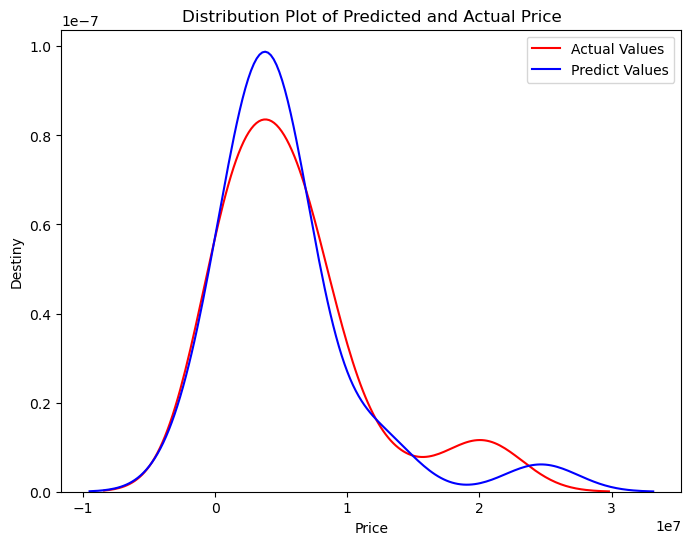

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color='red', label='Actual Values')
sns.kdeplot(y_Pre, color='blue', label = 'Predict Values')
plt.title('Distribution Plot of Predicted and Actual Price')
plt.xlabel('Price')
plt.ylabel('Destiny')
plt.legend()
plt.show()

RandomForest

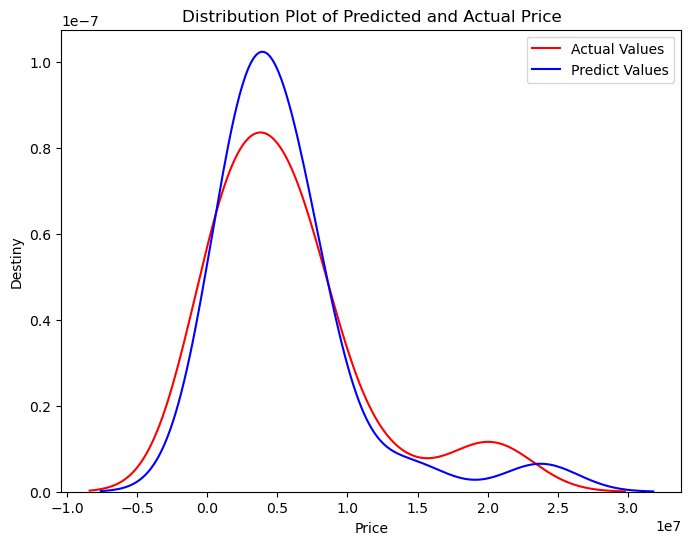

In [19]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color='red', label='Actual Values')
sns.kdeplot(y_Pre_2, color='blue', label = 'Predict Values')
plt.title('Distribution Plot of Predicted and Actual Price')
plt.xlabel('Price')
plt.ylabel('Destiny')
plt.legend()
plt.show()

Đối với mỗi mô hình, đường KDE cho giá trị dự đoán cho thấy mức độ phù hợp giữa dự đoán và giá trị thực tế. Trong biểu đồ của cả hai mô hình Linear Regression và RandomForest, đường dự đoán gần khớp với đường thực tế, điều đó cho thấy cả hai mô hình đều có khả năng phỏng đoán khá tốt. Để kết luận mô hình nào tốt hơn cần phải xem xét thêm các phân tích định lượng  như R-squared, Mean Squared Error

- Sử dụng hai thang đo Mean Squared Error (MSE) và R-squared (R^2) để đánh giá hai mô hình LinearRegression và RadomForest

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [21]:
def scoreModel(y_test, y_Pre):
  MSE = mean_squared_error(y_test, y_Pre)
  R2 = r2_score(y_test, y_Pre)
  print('MSE: ', MSE, '\n' + 'R2: ', R2, '\n')
  return MSE, R2

In [22]:
def result(X, y):
    y_Pre_LR = LR.predict(X)
    y_Pre_RFR = RFR.predict(X)
    score_LR = scoreModel(y, y_Pre_LR)
    score_RFR = scoreModel(y, y_Pre_RFR)
    table = pd.DataFrame([['LinearRegression'] + list(score_LR), ['RandomForestRegressor'] + list(score_RFR)], columns=['Model','MSE','R2'])
    return table

In [23]:
result(X_train,y_train)

MSE:  2544987686693.091 
R2:  0.9544165540091917 

MSE:  1257268956351.1187 
R2:  0.9774809709817419 



,Model,MSE,R2
0,LinearRegression,2.544988e+12,0.954417
1,RandomForestRegressor,1.257269e+12,0.977481


In [24]:
result(X_test,y_test)

MSE:  6124333899950.538 
R2:  0.787385134818507 

MSE:  3222408121724.6787 
R2:  0.8881295697535737 



,Model,MSE,R2
0,LinearRegression,6.124334e+12,0.787385
1,RandomForestRegressor,3.222408e+12,0.888130


Có thể thấy trong hai mô hình thì mô hình RandomForest cho thấy hiệu suất tốt nhất với R2 cao hơn và MSE thấp hơn. Nên nhóm sẽ dùng mô hình này để chạy và in ra kết quả dự đoán giá VGA 

In [25]:
Predict = RFR.predict(X_test)
result = pd.DataFrame( {'Predict' : Predict, 'Price' : y_test})
result.to_csv('./predict.csv')